# TPC1 -  Integração Numérica

<ul>
    <li>Não deve escrever o seu nome nem nenhum código identificador em nenhum sítio. </li>
    <li>Deve entregar ESTE Notebook de Jupyter.</li>
    <li>O trabalho é individual. Podem e devem haver discussões com colegas mas o resultado entregue é individual. </li>
    <li>Não deve acrescentar ou apagar nenhuma célula. </li>
    <li>Todas as explicações devem ser claras e concisas. </li>
    <li>É preferível fazer menos e fazer bem que muito e mal. </li>
    <li>O método @jit(nopython=True) do pacote numba pode diminuir o tempo de cálculo.</li>
    <li>A não verificação de alguma destas regras leva ao anulamento e exclusão da prova.</li>
</ul>


In [1]:
# Introduza o codigo geral aqui
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc, rcParams
from IPython.display import HTML, display, Math, Latex
rcParams['animation.html'] = 'html5'
%matplotlib inline


# 1. Série de Fourier

Uma função diz-se periódica se para todos os valores de $x$ verifica-se que $f(x+L)=f(x)$. Estas funções podem ser expressas à custa de uma base de funções periódicas, 
\begin{align}
f(x)=\sum_{n=-\infty}^{+\infty}c_{n}e^{ik_{n}x}
\end{align}
com os valores $k_{n}=2\pi n/L$ e os coeficientes $c_{n}$ dados por 
\begin{align}
c_{n}=\frac{1}{L}\int_{0}^{L}dxf(x)e^{-ik_{n}x}.
\end{align}
Esta expansão chama-se uma série de Fourier e pode ser entendida como decomposição numa base infinita de funções designadas por,
\begin{align}
\phi_{n}(x)=e^{ik_{n}x}
\end{align}
e na qual podemos definir um produto interno entre duas funções $f(x)$ e $g(x)$ como,
\begin{align}
f\cdot g=\frac{1}{L}\int_{0}^{L}dxf^{*}(x)g(x).
\end{align}
Com esta interpretação os coeficientes $c_{n}$ podem ser compreendidos como as projecções de uma função em cada elemento da base. 

1. Mostre analiticamente a ortogonalidade dos elementos da base, ou seja $\phi_{n}\cdot\phi_{m}=\delta_{mn}$.

Calculando o produto interno entre dois elementos da base,
\begin{align}
\phi_n \cdot \phi_m  & = \frac{1}{L} \int_0^Ldx e^{-i\frac{2\pi(n-m)}{L}x}\\
                     & =  \int_0^1dx e^{-2i\pi(n-m)x} \\
                     & = \begin{cases}
                         1 & \text{se} & n = m\\
                         0 & \text{se} & n \neq m\\ 
                         \end{cases}
\end{align}
Onde fizemos uma mudança de variável $x \rightarrow x L$ e usamos a informação que $n-m$ é um número inteiro.

2. Mostre analiticamente que assumindo a equação de expansão se pode verificar que $f(x)=f(x+L)$ para todo o $x$ para $k_{n}=2\pi n/L$.

Uma vez que a função $f(x)$ pode ser escrita como,
\begin{align}
f(x) = \sum_{n=-\infty}^{+\infty}c_{n}e^{ik_{n}x}\\
\end{align}
Logo podemos escrever que, 
\begin{align}
f(x + L) & = \sum_{n=-\infty}^{+\infty}c_{n}e^{ik_{n}(x + L) }\\
         & = \sum_{n=-\infty}^{+\infty}c_{n}e^{ik_{n}x} e^{i\frac{2\pi n L}{L}} \\
         & = \sum_{n=-\infty}^{+\infty}c_{n}e^{ik_{n}x} e^{i 2\pi n } \\
         & = \sum_{n=-\infty}^{+\infty}c_{n}e^{ik_{n}x} \\
         & = f(x)
\end{align}

3. Construa uma função que calcule uma série de coeficientes de Fourier para uma função arbitrária usando o método de Simpson. A função deve receber como argumentos pelo menos o parâmetro $L$, um array de $k_{n}$ e o número de intervalos de integração. 

O método de Simpson $1/3$ implica que o número de intervalos tem que o número de intervalos tem que ser par. Para isso iremos fazer uma divisão inteira por 2 e multiplicação por dois para forçar o número de intervalos par.


In [2]:
def get_coef(func, kn, L, M):
    Nk = len(kn)
    M = 2*(M//2)
    h = L / M
    x = np.linspace(0, L, M + 1)
    f = func(x)
    c = np.zeros(Nk, dtype=complex)
    for i,k in enumerate(kn):
        f1 = f * np.exp(-1.j * k * x)
        c[i] = h/3*( f1[0] + f1[-1] + 4 * f1[1:-1:2].sum() + 2 * ( f1[2:-2:2].sum() if len(f) > 3 else 0 ) )
    return c/L


4. Teste a sua função integrando as funções $f_{1}(x)=\sqrt{x+1}$, $f_{2}(x)=\sin(2\pi x)+x^{2}$ e $f_{3}(x)=\sin^{2}(\pi x)+x$ para $L=1$ e $k_{n}=0$. Calcule os integrais analiticamente e represente o desvio relativo do resultado do integral como função do número do número de intervalos. Escolha potências de dois para número de intervalos e escolha a escala log-log para o gráfico. Discuta o que observa.

Estas funções propostas têm integrais conhecidos:
\begin{align}
I_1 & = \int_{0}^{1}dx \sqrt{x + 1} = \frac{2}{3}(2\sqrt{2} - 1)\\
I_2 & = \int_{0}^{1}dx \sin(2\pi x) + x^2 = \frac{1}{3}\\
I_3 & = \int_{0}^{1}dx \sin(\pi x)^2 + x = 1\\
\end{align}

Na figura abaixo podemos verificar que no caso da primeira função podemos observar a dependência com $h^4$. No segundo caso o erro não depende de $h$ e é nulo logo para dois intervalos. No terceiro caso, para dois intervalos o erro é finito mas para todos os outros caso o erro é nulo. 

O motivo pelo que os dois últimos casos o erro é nulo é interessante.
As funções sao a soma de uma função trigonométrica com polinómios do primeiro ou do segundo grau. A segunda parte é sempre integrada exactamente devido ao uma vez que o método de Simpson integra exactamente polinómios de grau 2. O erro com $h$ só pode vir da função trigonométrica. 

Na disciplina vimos que o erro do método de Simpson pode ser escrito como, 
\begin{align}
\text{Erro}  &= \sum_{n=2}^{+\infty} C_{2n} h^{2n} I(a,b,f^{(2n)}) 
\end{align}

Logo para as as duas funções em análise, 
\begin{align}
I(0,1, f_2^{(2n)}) &= (- 2\pi^2)^n \int_0^1 dx \sin(2\pi x) = 0 \\
I(0,1, f_3^{(2n)}) &=  \int_0^1 dx \frac{d^{2n}}{dx^{2n}}\frac{1 - \cos(2 \pi x)}{2} \\
        &= - \frac{(-4\pi^2)^n }{2} \int_0^1 dx \cos(2 \pi x) = 0
\end{align}
para qualquer $n \ge 2$. Isto parece justificar o que se passa no erro de $f_2(x)$ mas não justifica o erro de $f_3(x)$ uma vez que para $n=2$ existe um erro finito.

A dedução desta expressão para o erro implicou um procedimento iterativo a partir da expressão 
\begin{align}
\text{Erro}  = & -\frac{1}{3}\sum_{m=1}^{+\infty} \frac{h^{2m} 2^{m-1} }{(2m)!} I(0,1,f^{(2m)}) \\
& + \frac{1}{3}\sum_{m=1}^{+\infty} \frac{h^{2m}}{(2m)!}
\left( \frac{2^{2m}}{2m+1} I_T(0,1,f^{(2m)},h) + \frac{2}{2m+1} I_C(0,1,f^{(2m)},h )\right)
\end{align}

Podemos observar que a derivada de ordem $2n \ge 2$ da função $f_3(x)$ é dada por, 
\begin{equation}
f^{(2n)}_{3} (x) = -\frac{(-4\pi^2)^n}{2} \cos(2\pi x)
\end{equation}
O que implica que $I(0,1,f^{(2m)}) = 0$ e $I_T(0,1,f^{(2m)},h) = 0$ para qualquer $h$ gerado pela subdivisão de em potências de dois. O erro é dado por, 
\begin{align}
\text{Erro}  = &  \frac{2}{3}\sum_{m=1}^{+\infty} \frac{h^{2m}}{(2m + 1)!}
 I_C(0,1,f^{(2m)},h )
\end{align}
que para $ x = 1/2 $ e $ h = 1/2 $ dá precisamente $1/6 = 0.166667$ em valor absoluto.
Porque motivo as duas expressões do erro dão resultados diferentes se uma foi derivada a partir da outra?
Deduzimos a série perturbativa com integrais da função usando a igualdade,
\begin{equation}
I_C(0,1,f^{(m)}, h) = I(0,1,f^{(m)}) - \sum_{n=1}^{+\infty}
\frac{h^{2 n}}{(2n+1)! 2^{2n}}I_C(0,1,f^{2n+m},h)
\end{equation}
Uma vez que o integral $I(0,1,f^{(m)}) = 0$ para $m\ge 2$, nunca conseguimos isolar nos integais exactos as contribuções do erro.Os integrais numéricos com a regra do ponto médio remanescentes dão sempre uma contribuição fixa que não diminui. 
Para os valores de $h < 1/2$ este problema já não surge uma vez que todas as estimativas obtidas com o ponto médio são nulas quando o numéro de intervalos é par.

Na figura abaixo representamos precisamente os erros relativos para as três funções. 

<IPython.core.display.Math object>

0.5 0.16666666666666652
0.25 0.0
0.125 0.0
0.0625 0.0


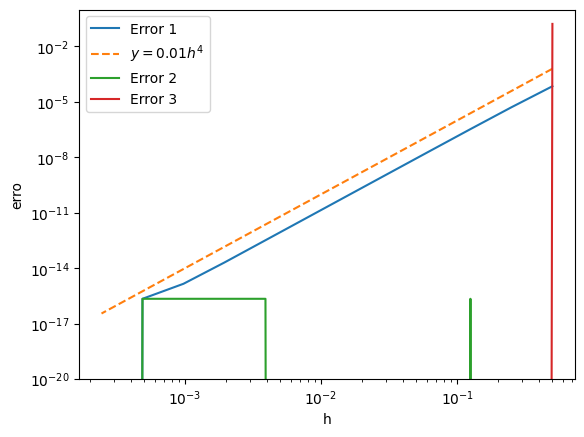

In [3]:
Ms = 2**np.arange(1,13)
error = np.zeros(len(Ms),dtype=float)

value = 2/3*(2*np.sqrt(2) - 1)
for i,M in enumerate(Ms):
    aa = np.real(get_coef(lambda x: np.sqrt(x + 1), np.array([0.0]), 1.0, M)[0])
    error[i] = np.abs(aa/value - 1)
plt.plot(1/Ms,error, label='Error 1')
plt.plot(1/Ms,0.01/Ms**4, '--', label=r'$y = 0.01 h^4$')

value = 1/3
for i,M in enumerate(Ms):
    aa = np.real(get_coef(lambda x: np.sin(2*np.pi*x) + x**2, np.array([0.0]), 1.0, M)[0])
    error[i] = np.abs(aa/value - 1)
plt.plot(1/Ms,error, label='Error 2')

value = 1.0
for i,M in enumerate(Ms):
    aa = np.real(get_coef(lambda x: np.sin(np.pi*x)**2 + x, np.array([0.0]), 1.0, M)[0])
    error[i] = np.abs(aa/value - 1)
plt.plot(1/Ms,error, label='Error 3')

display(Math(r'\text{Erro de } f_3(x):'))
for i in range(4):
    print(1/Ms[i], error[i])

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylim([1E-20,1])
plt.xlabel('h')
plt.ylabel('erro')
plt.show()


# Aproximação de funções com série finita

Numericamente não podemos somar uma série infinita, logo, temos limitar a série a um número máximo de valores de n. Com a série limitada a aproximação de ordem N de uma função será dada por, \begin{align}
f_{N}(x)=\sum_{n=-N}^{N}c_{n}e^{ik_{n}x}.
\end{align}

1. Considere a função periódica 
\begin{align}
f(x)=e^{-40(1-\sin^{2}(\pi x))}
\end{align}
de período $L=1$.

(a) Represente a função e as respectivas aproximações de Fourier para valores de N escolhidos entre potências de dois (\{2,4,8,16,32,64,128\}). Sugestão: Como a aproximação de Fourier poderá ter parte imaginária represente em dois gráficos diferentes a parte real e parte imaginária - faça isto sempre que for necessário.

Na figura podemos observar que a partir de $M = 16$ a diferença entre a aproximação e a função deixa de ser visível nesta escala. Note-se que para este valor o comprimento de onda é $1/16 = 0.0625$  ou seja da ordem da escala de largura da função. 

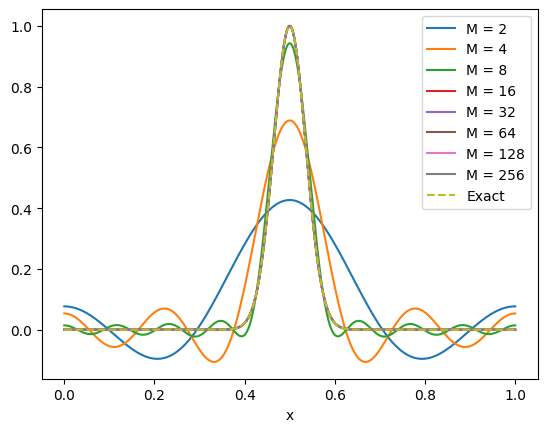

In [4]:
def evalutate_func(c,k,x):
    f = np.zeros(len(x),dtype=complex)
    for i in range(len(c)):
        f += c[i] * np.exp(1j * k[i] * x)
    return f


def func(x):
    return np.exp(-40*(1 - np.sin(np.pi * x)**2 ))

L = 1
x = np.linspace(0,1,1024)
for M in 2**np.arange(1,9):
    k = 2 * np.pi/L * np.linspace(-M, M, 2*M + 1)
    c = get_coef(func, k, L, int(M/L * 128))
    f = evalutate_func(c,k,x)
    plt.plot(x,f.real, label="M = " + str(M))
plt.plot(x,func(x),'--', label = "Exact")
plt.xlabel('x')
plt.legend()

(b) Para discutir a qualidade da aproximação podemos medir o desvio entre a função e a aproximação. Para este efeito, considere a grandeza,
\begin{align}
D_{N} &= \frac{\int_{0}^{L}dx\sqrt{\left|f(x)-f_{N}(x)\right|^{2}}}{\int_{0}^{L}dxf(x)}.
\end{align}
Represente os desvios $D_{N}$ para números inteiros consecutivos desde $0\le N<128$. Discuta o que observa e interprete os resultados.

Na figura está representada a grandeza $D_N$ como função do número de polinómios. Podemos observar que rapidamente a o desvio torna-se extremamente pequeno $< 10^{-7}$.

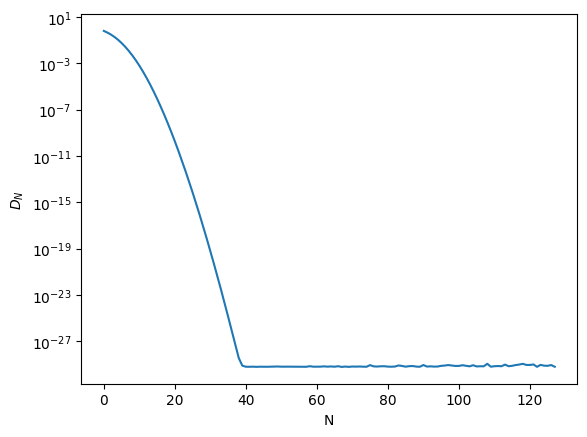

In [5]:
L = 1
DN = np.zeros(128)
x = np.linspace(0,1,1024)
for M in range(128):
    k = 2 * np.pi/L * np.linspace(-M, M, 2*M + 1)
    c = get_coef(func, k, L, int((M/L + 1 )* 128))
    fN = evalutate_func(c,k,x)
    f = func(x)
    f1 = np.abs(f - fN)**2
    num = f1[0] + f1[-1] + 4 * f1[1:-1:2].sum() + 2*f1[2:-2:2].sum()
    den = f[0] + f[-1] + 4 * f[1:-1:2].sum() + 2*f[2:-2:2].sum()
    DN[M] = num/den
plt.plot(DN)
plt.yscale('log')
plt.xlabel('N')
plt.ylabel(r'$D_N$')
plt.show()

(c) Em 1799 Parseval apresentou o teorema, 
\begin{align}
\sum_{n\in\mathbb{Z}}b_{n}^{*}a_{n}=\frac{1}{L}\int_{0}^{L}dxB^{*}(x)A(x)
\end{align}
onde $a_{n}$ e $b_{n}$ são respectivamente os coeficientes da decomposição de Fourier das funções $B(x)$ e $A(x)$. Uma aplicação possível é ver que a norma das duas representações deste objecto é conservada, 
\begin{align}
\sum_{n\in Z}\left|c_{n}\right|^{2}=\frac{1}{L}\int_{0}^{L}dx\left|f(x)\right|^{2}
\end{align}
quando limitamos a série a um número de termos finitos, podemos aferir a componente que falta calculando a diferença relativa,
\begin{align}
P_{M}=\left|1-\frac{\sum_{n=-M}^{M}\left|c_{n}\right|^{2}}{\frac{1}{L}\int_{0}^{L}dx\left|f(x)\right|^{2}}\right|.
\end{align}
Represente $P_{M}$ como função de $M$ e comente os resultados.

Podemos observar que esta $P_N$ tem um informação equivalente a $D_N$. Na figura abaixo vemos que converge rapidamente para zero e que a partir $N=30$ atingimos a precisão da vírgula flutuante. 

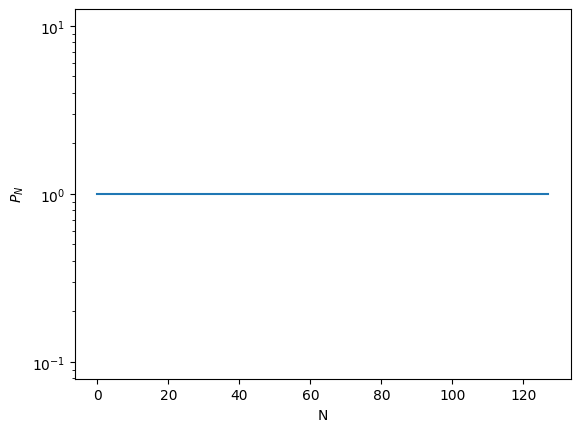

In [12]:
L = 1
PN = np.zeros(128)
x = np.linspace(0,1,1024)
h = x[1] - x[0]
for M in range(128):
    k = 2 * np.pi/L * np.linspace(-M, M, 2*M + 1)
    c = get_coef(func, k, L, int((M/L + 1 )* 128))
    f = func(x)**2
    num = np.sum(np.abs(c)**2 )
    den = (f[0] + f[-1] + 4 * f[1:-1:2].sum() + 2*f[2:-2:2].sum())*h/3
    PN[M] = np.abs(1 - num/den)
plt.plot(PN)
plt.yscale('log')
plt.xlabel('N')
plt.ylabel(r'$P_N$')
plt.show()

2. Repita a análise anterior para a função 
\begin{align}
f(x)=\begin{cases}
1 & 0\le mod(x,1)<0.5\\
0 & 0.5\le mod(x,1)\le1
\end{cases}
\end{align}
onde $mod(x,1)=x-int(x)$ corresponde à função resto. Neste caso surge o fenómeno de oscilações de Gibbs investigue o seu significado e discuta-o usando as ferramentas introduzidas neste problema. 

Esta função é descontínua pelo que perto da descontínuidade surgem oscilações espúrias  persistentes. Estas oscilações tornam-se cada vez mais concentradas na região da descontinuídade com o aumento do número de polinómios. Note-se que uma descontinuídade, precisa de uma resolução infinita para ser bem descrita. 
Este comportamento dá origem a uma convergência mais lenta da função, dando origem uma diminuição do erro em lei de potência ($1/M$).

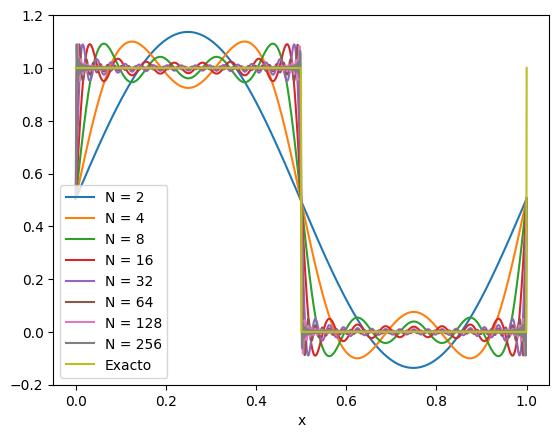

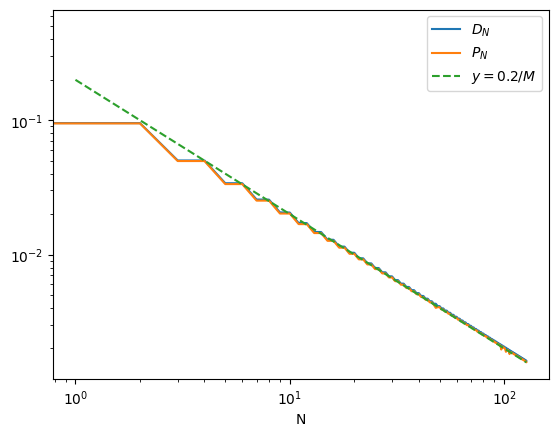

In [7]:
def func(x):
    x1 = x % 1
    return np.piecewise(x1, [x1< 0.5, x1 >= 0.5], [1, 0])

L = 1
x = np.linspace(0,1,1024)
for M in 2**np.arange(1,9):
    k = 2 * np.pi/L * np.linspace(-M, M, 2*M + 1)
    c = get_coef(func, k, L, int(M/L * 128))
    f = evalutate_func(c,k,x)
    plt.plot(x,f.real, label="N = " + str(M))
plt.plot(x,func(x), label="Exacto")
plt.xlabel('x')
plt.legend()
plt.show()

L = 1
DN = np.zeros(128)
den = 0.5
for M in range(128):
    k = 2 * np.pi/L * np.linspace(-M, M, 2*M + 1)
    MM = np.max([int((M/L + 1 )* 128), 1024])
    c = get_coef(func, k, L, MM )
    x = np.linspace(0,1,MM + 1)
    h = x[1]
    fN = evalutate_func(c,k,x)
    f = func(x)
    f1 = np.abs(f - fN)**2
    num = (f[0] + f1[-1] + 4 * f1[1:-1:2].sum() + 2*f1[2:-2:2].sum())*h/3
    DN[M] = num/den
plt.plot(DN, label=r'$D_N$')

PN = np.zeros(128)
x = np.linspace(0,1,1024)
h = x[1] - x[0]
for M in range(128):
    k = 2 * np.pi/L * np.linspace(-M, M, 2*M + 1)
    c = get_coef(func, k, L, int((M/L + 1 )* 128))
    f = func(x)**2
    num = np.sum(np.abs(c)**2 )
    PN[M] = np.abs(1 - num/den)
plt.plot(PN, label=r'$P_N$')
plt.plot(np.arange(1,128), 0.2/np.arange(1,128),'--', label=r'$y = 0.2/M$')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('N')
plt.legend()


# Propagação de ondas numa corda

Considere uma corda fixa pelas extremidades. A equação de movimento da altura em cada posição ($\psi(x,t)$) é dada por
\begin{align}
\frac{\partial^{2}\psi(x,t)}{\partial t^{2}}=c^{2}\frac{\partial^{2}\psi(x,t)}{\partial^{2}x}
\end{align}
onde $c$ é a com a condição fronteira determinada por $\psi(0,t)=\psi(L,t)=0$. 

1. Adimensionalize esta equação de modo a ter todas as quantidades físicas como quantidades adimensionais. 

Para adimensionalizar esta equação podemos escolher os padrões de comprimento e tempo, 
\begin{align}
x & = L x' \\
t & = \frac{L}{c} t' \\
\psi & = L \psi'
\end{align}
nestas unidades adimensionais obtemos a equação,
\begin{align}
\frac{\partial^{2}\psi'(x',t')}{\partial {t'}^{2}}=\frac{\partial^{2}\psi'(x',t')}{\partial{x'}^{2}}
\end{align}

A partir daqui iremos trabalhar sempre  com unidades adimensionalizadas e iremos deixar cair as linhas.


In [8]:
# Responda Aqui

2. Podemos tratar este problema expandindo a solução em série de Fourier para cada tempo,
\begin{align}
\psi_{N}(x,t)=\sum_{n=-N}^{N}c_{n}(t)e^{ik_{n}x}
\end{align}
e projectando a equação em cada elemento da base de funções $\phi_{m}(x)=e^{ik_{m}x}$, 
\begin{align}
\frac{1}{L}\int_{0}^{L}dx\phi_{m}^{*}(x)\frac{\partial^{2}\psi_{N}(x,t)}{\partial t^{2}}=\frac{c^{2}}{L}\int_{0}^{L}dx\phi_{m}^{*}(x)\frac{\partial^{2}\psi(x,t)}{\partial^{2}x}
\end{align}
obtemos 
\begin{align}
\frac{\partial^{2}c_{m}(t)}{\partial t^{2}}=-c^{2}k_{m}^{2}c_{m}(t). 
\end{align}
Esta equação diferencial para cada modo pode ser resolvida com a solução do tipo
\begin{align}
c_{m}(t)=A_{m}e^{i\omega_{m}t}+B_{m}e^{-i\omega_{m}t}.
\end{align}
Determine o valor de $\omega_{n}$, $A_{m}$ e $B_{m}$ para cada modo como função de $c_{m}(0)$ e $\dot{c}_m(0)$.

### Construção da solução da função de onda com série de Fourier

Vamos consider a equação de onda já adimensionalizada com recurso ao comprimento da corda e da velocidade de propagação,
\begin{align}
\frac{\partial^2 \psi }{\partial t^2} = \frac{\partial^2 \psi }{\partial x^2}
\end{align}
com as condições de fronteira 
\begin{equation}
\psi(0,t) = \psi(1,t) = 0
\end{equation}

Se tentarmos construir a solução usando uma base de funções periódicas de período $1$ (em unidades adimensionais), ou seja $\psi(x + 1, t) = \psi(x,t)$. Nesta base podemos escrever que 
\begin{align}
\psi(x,t) & = \sum_n c_n(t) e^{i k_n x} & \text{com } k_n &= \frac{2\pi n}{L} = 2\pi n 
\end{align}
Neste caso projectando a equação de onda nesta base obtemos
\begin{align}
\frac{\partial^2 c_n (t)}{\partial t^2} & = -k_n^2 c_n(t)
\end{align}
cuja solução é,
\begin{align}
c_n(t) & = A_n e^{i\omega_n t} + B_n e^{-i\omega_n t} & \text{com } & & \omega_n &= \frac{2\pi |n|}{L} = 2\pi |n| 
\end{align}
E as constantes $A_n$ e $B_n$ poderiam ser determinadas pela condição inicial. Definindo 
\begin{align}
\phi(x,t) = \frac{\partial \psi}{\partial t}
\end{align}
Como a corda estava para no instante inicial  $\phi(x,0) = 0$ e o deslocamento initial seria dado por $\psi(x,0)$. Logo podemos calcular decomposição de Fourier,
\begin{align}
c_n^\phi & = \frac{1}{L} \int_0^L dx \phi(x,0) e^{-ik_n x} = 0\\
c_n^\psi & = \frac{1}{L} \int_0^L dx \psi(x,0) e^{-ik_n x} \\
\end{align}
logo, 
\begin{align}
\begin{cases}
c_{n}^{\psi} & =A_{n}+B_{n}\\
c_{n}^{\phi} & =i\omega_{n}A_{n}-i\omega_{n}B_{n}
\end{cases}
&\Longleftrightarrow&
\begin{cases}
A_{n} & =\frac{c_{n}^{\psi}}{2}\\
B_{n} & =\frac{c_{n}^{\psi}}{2}
\end{cases}
\end{align}

O que implica que 
\begin{equation}
c_n(t) = c_n^\psi \cos \left(\omega_n t \right)
\end{equation}
Para satisfazer a condição fronteira para qualquer tempo implica que $\psi(0,t) = \psi(L,t) = 0$ logo, 
\begin{align}
\sum_{n=-M}^M c_n^\psi \cos\left(\omega_n t\right) = 0
\end{align}
uma vez que $e^{i k_n 0} = e^{i 2\pi|n|} = 1$. Nas unidades adimensionais $c_n(t) = c_n(t + 1)$ uma vez que $\cos(\omega_n t) = \cos(2\pi |n| t)$, logo $c_n(t)$ é uma função periódica de período $1$. 
Reorganizando o somatório obtemos que,
\begin{align}
\sum_{n = -M}^{M} c_n^\psi \frac{e^{i 2\pi |n| t} + e^{-i 2\pi |n| t}}{2} & = \sum_{n = -M}^{M} b_n e^{i 2\pi n t} = 0 & \text{com }\\
b_n & = \begin{cases}
\frac{c_n^\psi + c_{-n}^\psi }{2} & n\neq 0 \\
c_0^{\psi} & n = 0\\
\end{cases}
\end{align}
Como $b_n = 0$, concluímos que $c_n^\psi = - c_{-n}^\psi$ e $c_{0}^\psi = 0$. Contudo isto não é verdade em geral. Apenas é verdade para um conjunto muito restrito de deformações iniciais,
\begin{align}
c_n^\psi & = -c_{-n}^\psi \\
\int_0^1 dx \psi(x,0) e^{ - i k_n x} & = - \int_0^1 dx \psi(x,0) e^{  i k_n x} & x\rightarrow 1 - y\\
& =  \int_1^0 dy \psi(1 - y,0) e^{  i k_n (1 - y)} \\
& =  \int_1^0 dy \psi(1 - y,0) e^{ - i k_n y} \\
& = - \int_0^1 dy \psi(1 - y,0) e^{ - i k_n y} \\
& = - \int_0^1 dy \psi(1 - x,0) e^{ - i k_n x} & y \rightarrow x
\end{align}
Que é verdade se a condição inicial tiver a simetria $\psi(x,0) = - \psi(1 - x, 0)$.
Logo podemos concluir que esta base não é adequada para fixar estas condições fronteira. Podemos reparar que a fixação das condições de fronteira levou a que apenas metade dos coeficientes de Fourier podiam ser independentes. Isso implicou que a condição que $\psi(x,0)$ não podia ser completamente independente no seu domínio uma metade era obtida por reflexão da outra metade.
Podemos tentar construir uma solução baseada nesta simetria. Com este propósito iremos duplicar a célula periodica impondo na segunda metade a simetria $\psi(x, t) = - \psi(2 - x, t)$. Com esta abordagem podemos escrever, 
\begin{align}
\psi(x,t) & = \sum_{n=-M}^M c_n(t) e^{i k_n x} & \text{com } & k_n=\frac{2\pi n}{2} = \pi n\\
         c_n(t) & = \frac{1}{2} \int_0^2 dx \psi(x,t) e^{-i k_n x} \\
         & = \frac{1}{2} \int_0^1 dx \psi(x,t) e^{-i k_n x} + \frac{1}{2} \int_1^2 dx \psi(x,t) e^{-i k_n x} & x \rightarrow 2 - y \\
         & = \frac{1}{2} \int_0^1 dx \psi(x,t) e^{-i k_n x} - \frac{1}{2} \int_1^0 dy \psi(2-y,t) e^{-i k_n (2 - y)} \\
         & = \frac{1}{2} \int_0^1 dx \psi(x,t) e^{-i k_n x} + \frac{1}{2} \int_0^1 dx \psi(2-x,t) e^{i k_n x } \\
         & = -i \int_0^1 dx \psi(x,t) \sin(k_n x)
\end{align}
Onde usamos que $\exp(i k_n 2) = 1$. Note-se que com estes coeficientes $c_n(t) = -c_{-n}(t)$. Usando esta propriedade exprimimos a solução como,
\begin{align}
\psi(x,t) & = \sum_{n=-M}^M c_n(t) e^{i k_n x} \\
          & = \sum_{n=1}^M c_n(t) e^{i k_n x} + \sum_{n=1}^M c_{-n}(t) e^{-i k_n x}\\ 
          & = \sum_{n=1}^M c_n(t) e^{i k_n x} - \sum_{n=1}^M c_{ n}(t) e^{-i k_n x}\\ 
          & = 2i \sum_{n=1}^M c_n(t) \sin(\pi n x)\\ 
\end{align}
Que automaticamente verifica as condições fronteira em $x=0$ e $x=1$.

Com esta abordagem podemos então exprimir a solução em cada tempo como, 

\begin{align}
\psi(x,t) & = \sum_{1}^{M} b_{n}(t) \sin(\pi n x) \\
       b_n(t)   & = 2\int_0^1 \psi(x,t) \sin(\pi n x) 
\end{align}
Partindo da equação de onda,
\begin{align}
\frac{\partial^2 \psi(x,t)}{\partial t^2} & = \frac{\partial^2 \psi(x,t)}{\partial x^2} \\
\int_0^1 dx \sin(\pi n x) \frac{\partial^2 \psi(x,t)}{\partial t^2} & = \int_0^1 dx \sin(\pi n x) \frac{\partial^2 \psi(x,t)}{\partial x^2}\\
\frac{1}{2} \frac{\partial^2 b_n(t)}{\partial t^2} = - (\pi n)^2 \frac{b_n(t)}{2}
\end{align}
Cuja solução é $b_n(t) = A_n e^{i \pi n t} + B_n e^{-i \pi n t} $. Novamente as constantes são determinadas pelas condições iniciais e obtemos para o caso em que não há velocidade inicial obtemos
\begin{align}
A_n & = \frac{b_n(0)}{2} &   B_n &= \frac{b_n(0)}{2}
\end{align}
que dá origem àos coeficientes,
\begin{align}
b_n(t) & = b_n(0) \cos(\pi n t) \\
b_n(0) & = 2 \int_0^1 \psi(x,0) \sin(\pi n x) 
\end{align}
Se houver velocidade inicial, 
\begin{align}
\dot{b}_n(0)  & = 2 \int_0^1 \phi(x,0) \sin(\pi n x)\\
b_n(0) & = 2 \int_0^1 \psi(x,0) \sin(\pi n x) 
\end{align}
logo

\begin{align}
\begin{cases}
\frac{\dot{b}_n(0)}{i\pi n}  & = A - B \\
b_n(0) & = A+B
\end{cases}
&
\begin{cases}
A &= \frac{b_n(0)}{2} + \frac{\dot{b}_n(0)}{2 \pi n i}   \\
B &= \frac{b_n(0)}{2} - \frac{\dot{b}_n(0)}{2 \pi n i} 
\end{cases}
\end{align}

Que dá origem ao coeficiente,
\begin{equation}
b_n(t) = b_n(0) \cos(\pi n t) + \frac{\sin(\pi n t)}{\pi n} \dot{b}_n(0)
\end{equation}

3. Considerando que no instante inicial a corda estava parada e tinha um perfil dado por 
\begin{align}
\psi(x,0)=\frac{L}{100}\begin{cases}
\frac{10}{L}x & x\le\frac{L}{10}\\
1-\frac{10}{9L}\left(x-\frac{L}{10}\right) & \frac{L}{10}<x\le L
\end{cases}
\end{align}
represente a evolução no tempo fotografando a corda em diferentes tempos. Qual o valor mais adequado para $N$? Qual o papel da resolução?

#Responda Aqui

In [9]:
def get_coef(func, kn, L, M):
    Nk = len(kn)
    M = 2*(M//2)
    h = L / M
    x = np.linspace(0, L, M + 1)
    f = func(x)
    c = np.zeros(Nk, dtype=complex)
    for i,k in enumerate(kn):
        f1 = f * np.sin(k * x)
        c[i] = h/3*( f1[0] + f1[-1] + 4 * f1[1:-1:2].sum() + 2 * ( f1[2:-2:2].sum() if len(f) > 3 else 0 ) )
    return 2*c/L

def evalutate_func(cn,k,x, t):
    c = 1.0 # velocidade
    f = np.zeros(len(x),dtype=complex)
    for i in range(len(cn)):
        f += cn[i]*np.cos(c * k[i] * t) * np.sin(k[i] * x)
    return f

def func(x):
    return np.piecewise(x, [x < 1/10, x >= 1/10], [lambda x : 0.1 * x, lambda x: 0.01 *(1 - 10/9 *(x - 0.1))])





fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(-0.012, 0.012)
ax.set_xlabel('x')
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(frame_num, x1, c, k):
    f = evalutate_func(c,k,x1, 0.005*frame_num).real
    line.set_data((x1, f))
    return (line,)

N = 512
k = np.pi * np.arange(1, N)
c = get_coef(func, k, 1, N * 128)
x1 = np.linspace(0,1,512)
anim = animation.FuncAnimation(fig, lambda n : animate(n, x1, c, k), init_func=init,frames=400, interval=20, blit=True)
plt.close(anim._fig)
HTML(anim.to_html5_video())


4. Repita o problema anterior com o perfil iniciado dado por
\begin{align}
\psi(x,0)=\frac{L}{100}e^{-\frac{\left(x-L/2\right)^{2}}{2\sigma^{2}}}
\end{align}
com $\sigma=L/20$. Comente o que observa. 

#Responda Aqui

In [10]:
def func(x):
    return 0.01*np.exp(- 0.5*( (x - 0.5)/0.05 )**2)

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(-0.012, 0.012)
ax.set_xlabel('x')
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(frame_num, x1, c, k):
    f = evalutate_func(c,k,x1, 0.005*frame_num).real
    line.set_data((x1, f))
    return (line,)

N = 512
k = np.pi * np.arange(1, N)
c = get_coef(func, k, 1, N * 128)
x1 = np.linspace(0,1,512)
anim = animation.FuncAnimation(fig, lambda n : animate(n, x1, c, k), init_func=init,frames=400, interval=20, blit=True)
plt.close(anim._fig)
HTML(anim.to_html5_video())


5. Que condição inicial era preciso escolher para o que o impulso da alínea anterior se mova para a direita? Sugestão: A solução geral da equação de onda é dada por pela combinação linear de duas ondas propagantes 
$\psi(x)=A\tilde{\psi}(x-ct)+B\tilde{\psi}(x+ct)$.

Genericamente a solução da equação de onda é dada por
\begin{align}
\psi(x,t) & = \Psi_+ (x - c t) + \Psi_- (x + c t) \\
\frac{\partial \psi(x,t)}{\partial x} & =  \frac{\partial \Psi_+ }{\partial x} + \frac{\partial \Psi_- }{\partial x}\\
\phi(x,t) &= \frac{\partial \psi(x,t)}{\partial t} = -  c\frac{\partial \Psi_+ }{\partial x} + c\frac{\partial \Psi_- }{\partial x}  
\end{align}
Ou seja uma combinação linear de propagantes que se movem ou para a esquerda ou para a direita com velocidade $c$. 
Logo para $t = 0$, obtemos,
\begin{align}
\begin{cases}
\frac{\partial \psi(x,0)}{\partial x} & =  \frac{\partial \Psi_+ }{\partial x} + \frac{\partial \Psi_- }{\partial x}\\
\frac{\phi(x,0)}{c} &=  -  \frac{\partial \Psi_+ }{\partial x} + \frac{\partial \Psi_- }{\partial x}  
\end{cases} 
& \Longleftrightarrow 
\begin{cases}
\frac{\partial \Psi_+ }{\partial x} & =\frac{1}{2} \frac{\partial \psi(x,0)}{\partial x} - \frac{1}{2}\frac{\phi(x,0)}{c} \\
\frac{\partial \Psi_- }{\partial x} & =\frac{1}{2} \frac{\partial \psi(x,0)}{\partial x} + \frac{1}{2}\frac{\phi(x,0)}{c}
\end{cases} 
\end{align}
Integrando entre $0$ e $x$ obtemos,
\begin{cases}
\Psi_+(x)  & = \Psi_+(0) + \frac{1}{2} \left( \psi(x,0)  - \int_0^x dx' \frac{\phi(x',0)}{c} \right) \\
\Psi_-(x)  & = \Psi_-(0) + \frac{1}{2} \left( \psi(x,0)  + \int_0^x dx' \frac{\phi(x',0)}{c} \right)
\end{cases} 
Com $\psi(0,0) = 0$ implica que $\Psi_+(0) = - \Psi_-(0) $ e podemos sem prejuizo escolher estas constantes como nulas uma vez que a solução nunca depende delas. 
O que acontece quando escolhemos uma condição inicial com velocidade nula $\phi(x, 0) = 0? 
\begin{cases}
\Psi_+(x)  & =   \frac{ \psi(x,0)}{2}    \\
\Psi_-(x)  & =   \frac{\psi(x,0)}{2}   
\end{cases} 
A solução são duas funçoes iguais a metade da deformação inicial que se movem em sentidos opostos!
O motivo pelo qual invertem na colisão com a parede pode ser visto a chegada da imagem invertida da segunda metade do intervalo e que se desloca no sentido inverso (ver a primeira figura)!

Para se obter um impulso que se move para a direita é necessário que $\Psi_-$ seja nulo, ou seja, 
\begin{align}
\phi(x,0) & = - c \frac{\partial \Psi(x,0)}{\partial x} \\
\end{align}
Escolhendo, 
\begin{align}
\psi(x,0) & = \frac{L}{100}e^{-\frac{\left(x-L/2\right)^{2}}{2\sigma^{2}}} \\
\phi(x,0) & = c \frac{x-L/2}{\sigma^2} \frac{L}{100}e^{-\frac{\left(x-L/2\right)^{2}}{2\sigma^{2}}}
\end{align}
Como vimos atrás, a partir da deformação e velocidade iniciais da corda podemos obter os coeficientes de Fourier, $b_n(t)$ e $ \dot{b}_n(0)$ e a sua respectiva evolução no tempo. 

In [11]:
def func1(x):
    xl = (x - 0.5)/0.05
    return 0.01*np.exp(- 0.5*xl**2)

def func2(x):
    xl =  (x - 0.5)/0.05
    return 0.01*xl/0.05 * np.exp(- 0.5*xl**2 )


fig, ax = plt.subplots(2,1)
ax[0].set_xlim(0, 2)
ax[0].set_ylim(-0.012, 0.012)
ax[0].set_xlabel('x')
line1, = ax[0].plot([], [], lw=2)

ax[1].set_xlim(0, 1)
ax[1].set_ylim(-0.012, 0.012)
ax[1].set_xlabel('x')
line2, = ax[1].plot([], [], lw=2)

def evalutate_func2(cn,cnl, k,x, t):
    c = 1.0 # velocidade
    f = np.zeros(len(x),dtype=complex)
    for i in range(len(cn)):
        f += (cn[i]*np.cos(c * k[i] * t)  + cnl[i] * np.sin(c * k[i] * t)/(i + 1)/np.pi  ) * np.sin(k[i] * x) 
    return f

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return (line1, line2)


def animate(frame_num, c, cl,  k):
    x1 = np.linspace(0,2,512)
    x2 = np.linspace(0,1,512)
    f = evalutate_func(c,k,x1, 0.005*frame_num).real
    line1.set_data((x1, f))
    
    f = evalutate_func2(c,cl,k,x2, 0.005*frame_num).real
    line2.set_data((x2, f))
    
    return (line1,line2)



N = 256
k = np.pi * np.arange(1, N)
c = get_coef(func1, k, 1, N * 128)
cl = get_coef(func2, k, 1, N * 128)

anim2 = animation.FuncAnimation(fig, lambda n : animate(n, c,cl, k), init_func=init,frames=400, interval=20, blit=True)
plt.close(anim2._fig)
HTML(anim2.to_html5_video())






Bom Trabalho